Importing libraries to perform calculation of prediction of sales

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import io
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Uploading of csv file from desktop to colab.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


Reading csv file as a dataframe. DataFrames are faster, easier to use, and more powerful than tables or spreadsheets because they're an integral part of the Python and NumPy ecosystems.

In [ ]:
f = pd.read_csv(io.BytesIO(uploaded['Advertising.csv']))

Checking information of the dataframe and if there are any null values.

In [ ]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Data visualization**
It provides a medium to present data in a statistical graph format as an informative and attractive medium to impart some information.

<Axes: >

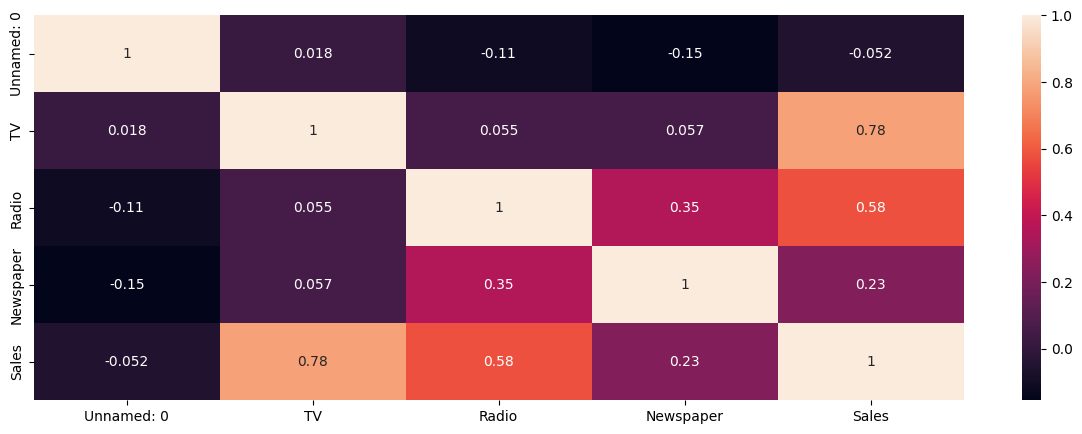

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(f.corr(),annot=True)

In [ ]:
f['TV_sq'] = f['TV']**2
f['Radio_sq'] = f['Radio']**2

f['TV_Radio'] = f['TV'] * f['Radio']

X = f[['TV', 'Radio', 'Newspaper', 'TV_sq', 'Radio_sq', 'TV_Radio']]

y = f[['Sales']].values

X = f.drop('Sales', axis=1)
y = f['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Creating a linear regression model.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error=', mse)

Mean squared error= 0.36929321119335634


Calculating the predictions

In [ ]:
y_predictions=model.predict(X_test)
y_predictions

array([17.221858  , 22.77485936, 20.58104344,  7.51109956, 24.25465298,
       12.45059462, 22.77955034,  8.21900937, 12.01832187, 15.66713515,
        8.06828914,  8.06544827, 12.43853701,  6.4362977 , 10.50287964,
       12.3502833 ,  6.65940538, 16.52242001, 10.59411128, 18.88314878,
       20.28390708, 12.44022519,  9.89441985, 22.2763074 ,  8.9085793 ,
        7.63205663, 22.39393442, 12.63247685, 10.13321222,  6.48296839,
       11.70978746, 10.21974577, 23.44289903,  8.67938196, 15.55491943,
       20.8422594 , 11.44707022, 20.4450285 , 11.73801892,  6.41223174,
       10.73236988, 12.67786288,  9.227256  ,  9.01007485, 11.8015293 ,
        6.98149449,  9.90737303, 14.76707956, 10.07400163, 11.43486518,
       14.15084454, 12.05851771,  8.19580412,  7.32138065,  8.37614379,
       10.89527974,  9.99469681, 25.38663087,  6.96854319, 11.78797645])

In [ ]:
from sklearn import metrics

print('Mean Absolute Error=',metrics.mean_absolute_error(y_predictions,y_test))
print('Root of the Mean of the Square of Errors=',np.sqrt(metrics.mean_squared_error(y_predictions,y_test)))
print('R-Squared=',metrics.r2_score(y_predictions,y_test))


Mean Absolute Error= 0.5024209805362901
Root of the Mean of the Square of Errors= 0.607694998492958
R-Squared= 0.9867035413672802
